In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('data.csv')

#clean data
df = df[df['length'].notna()]
df.loc[237, 'diet'] = 'herbivorous'
df.loc[182, 'diet'] = 'carnivorous'

In [3]:
def convert_float(s):
    return float(s)

df['length'] = df['length'].str[:-1].astype(float)

In [4]:
def clean_period(p):
    if "Jurassic" in p:
        return "Jurassic"
    elif "Cretaceous" in p:
        return "Cretaceous"
    elif "Triassic" in p:
        return "Triassic"
    else:
        return np.nan

df['period'] = df['period'].apply(clean_period)

In [5]:
def convert_continent(country):
    country_to_continent = {
        'South Africa': 'Africa',
        'Egypt': 'Africa',
        'Niger': 'Africa',
        'Morocco': 'Africa',
        'Zimbabwe': 'Africa',
        'North Africa': 'Africa',
        'Tanzania': 'Africa',
        'Madagascar': 'Africa',
        'Lesotho': 'Africa',
        'Malawi': 'Africa',
        'Tunisia': 'Africa',
        'Argentina': 'South America',
        'Brazil': 'South America',
        'Uruguay': 'South America',
        'USA': 'North America',
        'Canada': 'North America',
        'Mongolia': 'Asia',
        'China': 'Asia',
        'Kazakhstan': 'Asia',
        'Uzbekistan': 'Asia',
        'India': 'Asia',
        'Russia': 'Asia',
        'France': 'Europe',
        'Spain': 'Europe',
        'Germany': 'Europe',
        'United Kingdom': 'Europe',
        'Romania': 'Europe',
        'Switzerland': 'Europe',
        'Wales': 'Europe',
        'Australia': 'Australia',
        'Antarctica': 'Antarctica',
        'Japan': 'Asia'
    }
    if country in country_to_continent:
        return country_to_continent[country]
    else:
        return np.nan

df['continent'] = df['lived_in'].apply(convert_continent)

In [6]:
train_data = pd.get_dummies(df, columns=['diet', 'type', 'continent']).dropna()
period = train_data['period']
train_data = train_data.drop(columns=['name', 'period', 'lived_in', 'taxonomy', 'named_by', 'species', 'link'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train_data, period, test_size=0.20)

In [8]:
clf1 = RandomForestClassifier(max_depth=2, random_state=0)
clf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [9]:
clf2 = LogisticRegression(random_state=0).fit(X_train, y_train)
clf2.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['Cretaceous', 'Cretaceous', 'Jurassic', 'Cretaceous', 'Cretaceous',
       'Cretaceous', 'Cretaceous', 'Cretaceous', 'Cretaceous',
       'Cretaceous', 'Cretaceous', 'Cretaceous', 'Cretaceous', 'Jurassic',
       'Jurassic', 'Cretaceous', 'Cretaceous', 'Cretaceous', 'Cretaceous',
       'Cretaceous', 'Cretaceous', 'Cretaceous', 'Cretaceous',
       'Cretaceous', 'Cretaceous', 'Jurassic', 'Cretaceous', 'Jurassic',
       'Cretaceous', 'Cretaceous', 'Cretaceous', 'Cretaceous',
       'Cretaceous', 'Cretaceous', 'Cretaceous', 'Cretaceous',
       'Cretaceous', 'Cretaceous', 'Cretaceous', 'Cretaceous',
       'Cretaceous', 'Cretaceous', 'Cretaceous', 'Cretaceous', 'Jurassic',
       'Cretaceous', 'Jurassic', 'Jurassic', 'Cretaceous', 'Cretaceous',
       'Cretaceous', 'Cretaceous', 'Cretaceous', 'Cretaceous',
       'Cretaceous', 'Cretaceous', 'Triassic'], dtype=object)

In [10]:
clf3 = SVC(gamma='auto')
clf3.fit(X_train, y_train)

SVC(gamma='auto')

In [11]:
clf4 = KNeighborsClassifier(n_neighbors=5)
clf4.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
models = [clf1, clf2, clf3, clf4]

In [13]:
accuracies = np.array([])
for m in models:
    accuracies = np.append(accuracies, (m.predict(X_test)==y_test).mean())

In [14]:
results = pd.DataFrame(accuracies, columns=['Accuracy'], index=['Random Forest', 'Logistic Regression', 'SVM', 'KNearestNeighbors'])

In [15]:
model_names = ['Random Forest', 'Logistic Regression', 'SVM', 'KNearestNeighbors']

(0.0, 1.0)

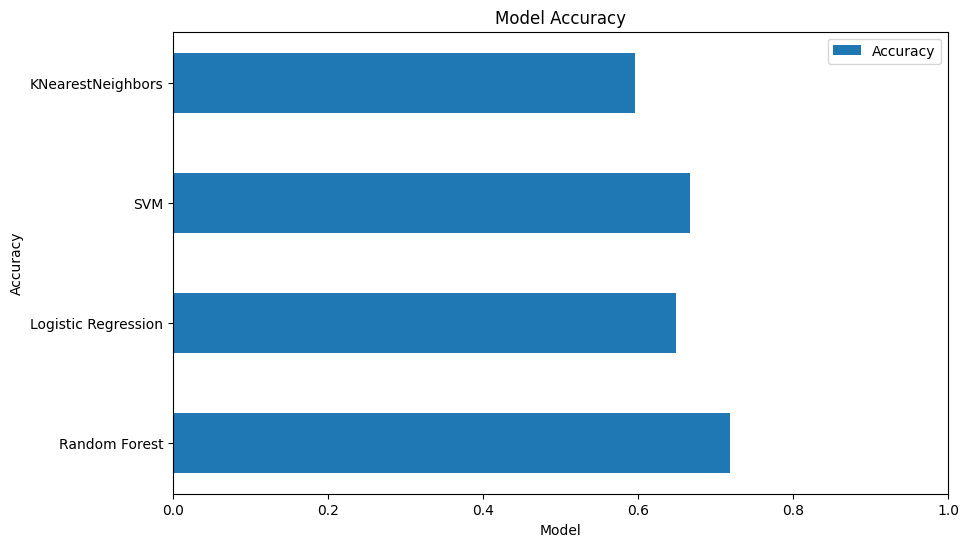

In [16]:
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, height=.5, label='Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.xlim(0, 1)